In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import features extracted from light curves

In [2]:
df = pd.read_csv('features2.csv', header=None, skiprows=1)
header = pd.read_csv('features2.csv', header=None, nrows=1)
df.columns = header.iloc[0]

In [3]:
df.head()

,g_mean,g_wmean,g_MAD,g_IQR,g_f60,g_f70,g_f80,g_f90,g_skew,g_kurtosis,...,r_f90,r_skew,r_kurtosis,r_welsh_J,r_welsh_K,label,sourceid,RAdeg,DEdeg,ID
0,18.266840,18.268926,0.030771,0.061090,0.069597,0.087088,0.113279,0.146547,-0.491997,0.573063,...,0.079991,-0.033536,-0.674624,0.000644,0.637462,RSCVN,487839,295.05785,12.56705,ZTFJ194013.88+123401.3
1,19.925826,19.969903,0.145218,0.286871,0.310142,0.407433,0.478775,0.624174,-0.123830,0.498638,...,0.523111,-0.618238,0.225351,0.019193,4.931144,SR,271695,277.02911,1.31651,ZTFJ182806.98+011859.4
2,19.161813,19.299435,0.264480,0.503004,0.578186,0.674479,0.751739,0.965016,-0.451999,-0.087775,...,0.620676,-0.478345,-0.851582,0.040503,2.874549,RR,570008,301.21524,-9.10789,ZTFJ200451.65-090628.4
3,16.602879,16.612717,0.091207,0.171326,0.267252,0.362235,0.435667,0.553401,-0.941617,0.653601,...,0.406826,-1.236671,1.955880,0.008101,11.155628,SR,437926,291.73444,26.68351,ZTFJ192656.26+264100.6
4,19.415213,19.456420,0.166479,0.321408,0.412489,0.473536,0.559076,0.620158,-0.248337,-0.686700,...,0.497180,0.080274,-0.926671,0.020252,10.024668,SR,331495,284.12455,-5.11396,ZTFJ185629.89-050650.2


# Plot location of light curve sources in the sky

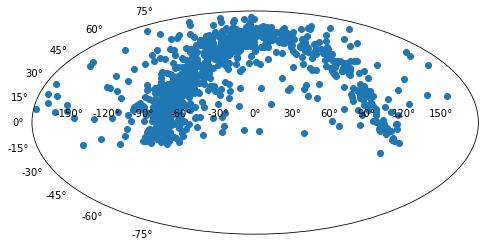

In [4]:
import astropy.coordinates as coord
import astropy.units as u

ra = coord.Angle(df.RAdeg, unit=u.degree)

ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(df.DEdeg, unit=u.degree)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)

# Plot histogram of variable types

<AxesSubplot:xlabel='label', ylabel='Count'>

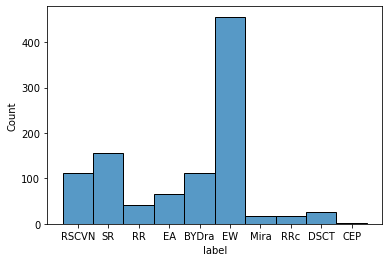

In [7]:
import seaborn as sns
sns.histplot(data=df, x=df.label)

# Drop rows with Blank values

In [10]:
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)

# Split into training and test data

In [11]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Map string labels to numbers
label = df.label


le = preprocessing.LabelEncoder()
le.fit(label)

# Drop columns that are not features
X = df
# Encode labels to form y labels
y = le.transform(df.label)

# Split dataset into training set and test set
X_tr, X_ts, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
X_train = X_tr.drop(['label','ID','sourceid', 'RAdeg','DEdeg'],axis='columns')
X_test = X_ts.drop(['label','ID','sourceid', 'RAdeg','DEdeg'],axis='columns')

# Train a simple Random Forest

In [12]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

# Predict test data output
y_pred=clf.predict(X_test)

# Estimate model accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.697508896797153


## Prediction Error distribution accross variable type class

<AxesSubplot:xlabel='Test', ylabel='Count'>

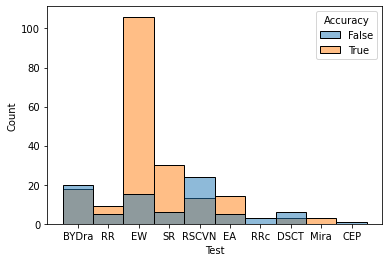

In [15]:
y_test_labels = le.inverse_transform(y_test)
y_pred_labels = le.inverse_transform(y_pred)

# Form a dataframe of test vs predicted labels
pd_prediction = pd.DataFrame()
pd_prediction['Test'] = y_test_labels
pd_prediction['Pred'] = y_pred_labels
pd_prediction['Accuracy'] = y_test_labels == y_pred_labels
pd_prediction.head()

sns.histplot(data=pd_prediction, x=pd_prediction.Test, hue = pd_prediction.Accuracy)

# sns.histplot(data=pred_err, x=pred_err.Test)